# Testing Random Forest using 4 year window.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load datasets
team_stats_df = pd.read_csv('team_stats_0423_sorted.csv')
standings_df = pd.read_csv('NBA_Standings_Ranked_Classes.csv')
elo_df = pd.read_csv('elo_ratings_per_year.csv')


C:\Users\janmi\AppData\Local\Temp\ipykernel_13924\3938822569.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  team_stats_df = pd.read_csv('team_stats_0423_sorted.csv')


In [3]:
# Merge the Elo ratings into your team stats dataset
team_stats_df = pd.merge(team_stats_df, elo_df[['Year', 'Team', 'Elo Rating']], how='left', on=['Year', 'Team'])

# Merge the team stats with the updated standings data
merged_data = pd.merge(team_stats_df, standings_df, how='left', on=['Year', 'Team'])

# Filter the data by year range
filtered_data = merged_data[merged_data['Year'] >= 2004]


In [4]:
# Function to train, test
def train_and_evaluate_yearly(conference_data, start_year, end_year):
    # Train on data from start_year to end_year-1 and test on end_year
    train_data = conference_data[(conference_data['Year'] >= start_year) & (conference_data['Year'] < end_year)]
    test_data = conference_data[conference_data['Year'] == (end_year + 1)]
    
    X_train = train_data[['Elo Rating']]
    y_train = train_data['ranking_class']

    X_test = test_data[['Elo Rating']]
    y_test = test_data['ranking_class']

    # Initialize and train the Random Forest model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf.predict(X_test)

    # Evaluate the model
    print(f"=== Year: {end_year} ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Compute and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=y_test.unique(), 
                yticklabels=y_test.unique())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Year: {end_year}')
    plt.show()



=== Predicting 2008 Rankings ===

Eastern Conference:
=== Year: 2008 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.75      0.60      0.67       410
   Lower Mid       0.25      0.33      0.29       246
       Top 3       0.60      1.00      0.75       246
   Upper Mid       0.50      0.25      0.33       328

    accuracy                           0.53      1230
   macro avg       0.53      0.55      0.51      1230
weighted avg       0.55      0.53      0.52      1230

Accuracy Score: 0.5333333333333333


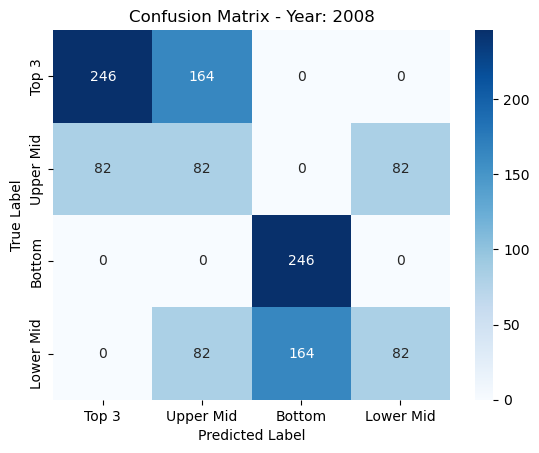


Western Conference:
=== Year: 2008 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.83      1.00      0.91       410
   Lower Mid       1.00      0.33      0.50       246
       Top 3       1.00      0.67      0.80       246
   Upper Mid       0.67      1.00      0.80       328

    accuracy                           0.80      1230
   macro avg       0.88      0.75      0.75      1230
weighted avg       0.86      0.80      0.78      1230

Accuracy Score: 0.8


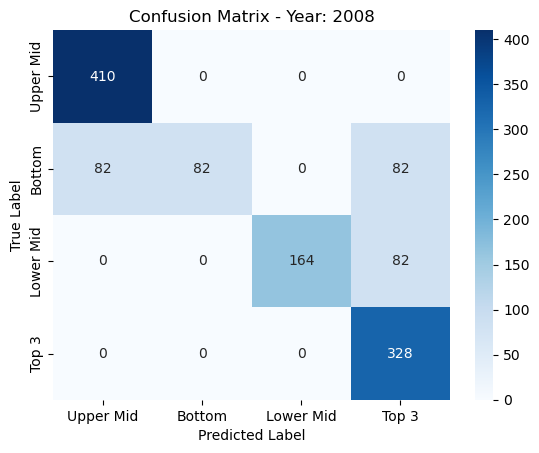


=== Predicting 2009 Rankings ===

Eastern Conference:
=== Year: 2009 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.83      1.00      0.91       410
   Lower Mid       0.50      0.33      0.40       246
       Top 3       0.60      1.00      0.75       246
   Upper Mid       0.50      0.25      0.33       328

    accuracy                           0.67      1230
   macro avg       0.61      0.65      0.60      1230
weighted avg       0.63      0.67      0.62      1230

Accuracy Score: 0.6666666666666666


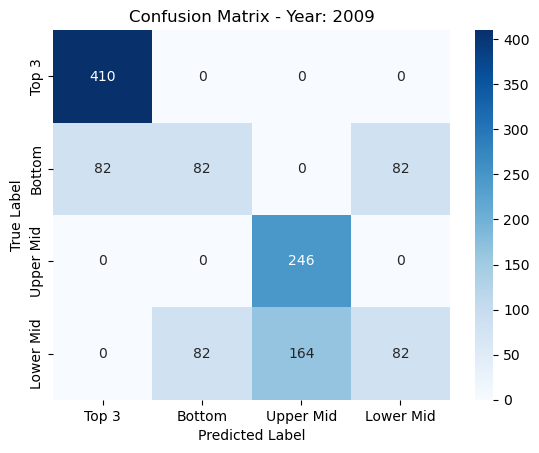


Western Conference:
=== Year: 2009 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       410
   Lower Mid       0.25      0.33      0.29       246
       Top 3       0.67      0.67      0.67       246
   Upper Mid       0.50      0.50      0.50       328

    accuracy                           0.60      1230
   macro avg       0.60      0.57      0.59      1230
weighted avg       0.65      0.60      0.62      1230

Accuracy Score: 0.6


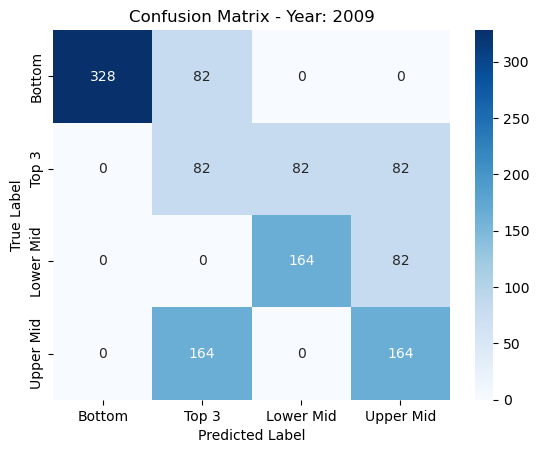


=== Predicting 2010 Rankings ===

Eastern Conference:
=== Year: 2010 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       426
   Lower Mid       0.50      0.67      0.57       253
       Top 3       0.75      1.00      0.86       253
   Upper Mid       0.67      0.50      0.57       339

    accuracy                           0.73      1271
   macro avg       0.73      0.74      0.72      1271
weighted avg       0.76      0.73      0.74      1271

Accuracy Score: 0.7340676632572777


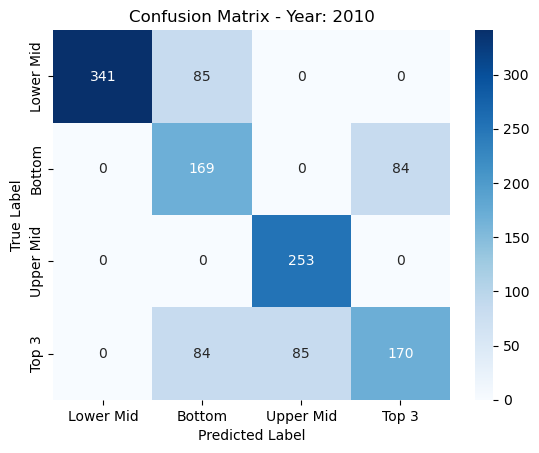


Western Conference:
=== Year: 2010 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       423
   Lower Mid       1.00      0.66      0.80       253
       Top 3       1.00      1.00      1.00       254
   Upper Mid       0.67      1.00      0.80       337

    accuracy                           0.87      1267
   macro avg       0.92      0.87      0.87      1267
weighted avg       0.91      0.87      0.87      1267

Accuracy Score: 0.8666140489344909


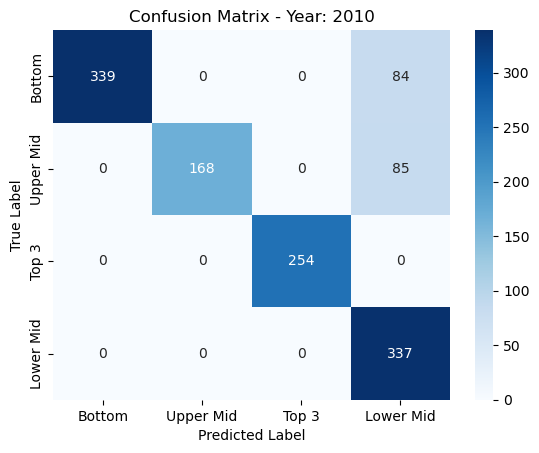


=== Predicting 2011 Rankings ===

Eastern Conference:
=== Year: 2011 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.60      0.75       330
   Lower Mid       0.33      0.31      0.32       210
       Top 3       0.73      1.00      0.85       233
   Upper Mid       0.59      0.71      0.65       294

    accuracy                           0.66      1067
   macro avg       0.66      0.66      0.64      1067
weighted avg       0.70      0.66      0.66      1067

Accuracy Score: 0.6616682286785379


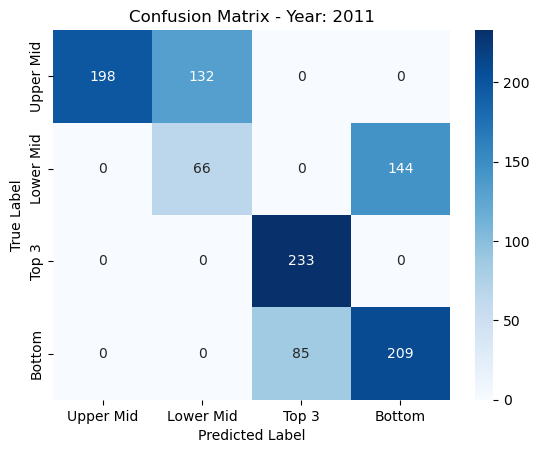


Western Conference:
=== Year: 2011 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       330
   Lower Mid       0.49      1.00      0.66       200
       Top 3       1.00      0.68      0.81       240
   Upper Mid       0.66      0.51      0.58       289

    accuracy                           0.73      1059
   macro avg       0.79      0.75      0.73      1059
weighted avg       0.81      0.73      0.74      1059

Accuracy Score: 0.7318224740321058


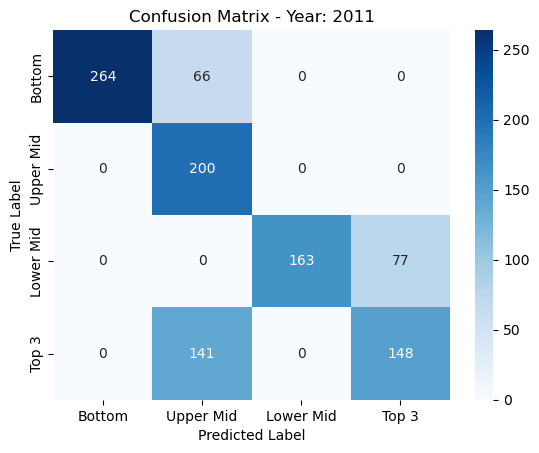


=== Predicting 2012 Rankings ===

Eastern Conference:
=== Year: 2012 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.67      0.80      0.73       410
   Lower Mid       0.20      0.33      0.25       246
       Top 3       1.00      0.67      0.80       245
   Upper Mid       0.50      0.25      0.33       327

    accuracy                           0.53      1228
   macro avg       0.59      0.51      0.53      1228
weighted avg       0.60      0.53      0.54      1228

Accuracy Score: 0.5342019543973942


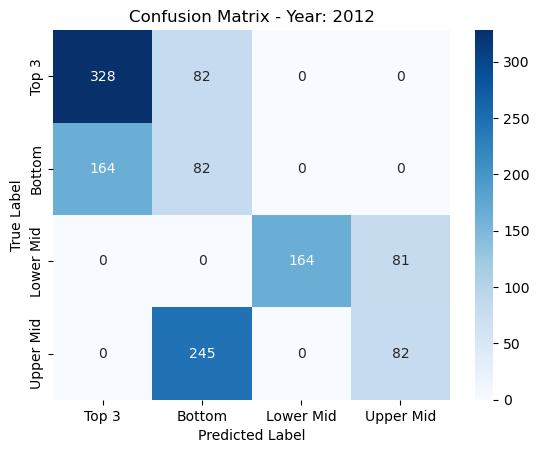


Western Conference:
=== Year: 2012 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.71      1.00      0.83       410
   Lower Mid       1.00      0.67      0.80       246
       Top 3       0.60      1.00      0.75       246
   Upper Mid       1.00      0.25      0.40       328

    accuracy                           0.73      1230
   macro avg       0.83      0.73      0.70      1230
weighted avg       0.82      0.73      0.69      1230

Accuracy Score: 0.7333333333333333


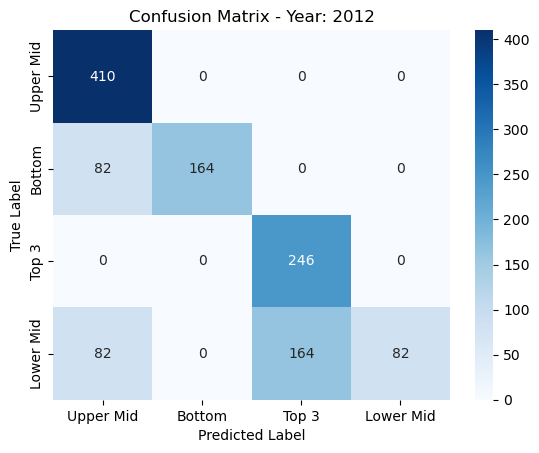


=== Predicting 2013 Rankings ===

Eastern Conference:
=== Year: 2013 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.71      1.00      0.83       410
   Lower Mid       0.67      0.67      0.67       246
       Top 3       1.00      0.67      0.80       246
   Upper Mid       0.67      0.50      0.57       328

    accuracy                           0.73      1230
   macro avg       0.76      0.71      0.72      1230
weighted avg       0.75      0.73      0.72      1230

Accuracy Score: 0.7333333333333333


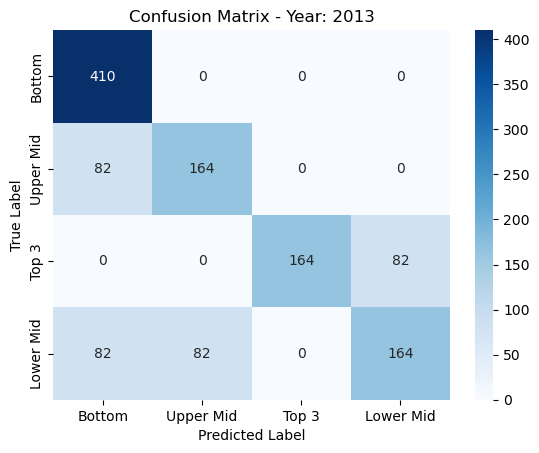


Western Conference:
=== Year: 2013 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       410
   Lower Mid       0.33      0.33      0.33       246
       Top 3       0.75      1.00      0.86       246
   Upper Mid       0.50      0.50      0.50       328

    accuracy                           0.67      1230
   macro avg       0.65      0.66      0.64      1230
weighted avg       0.68      0.67      0.67      1230

Accuracy Score: 0.6666666666666666


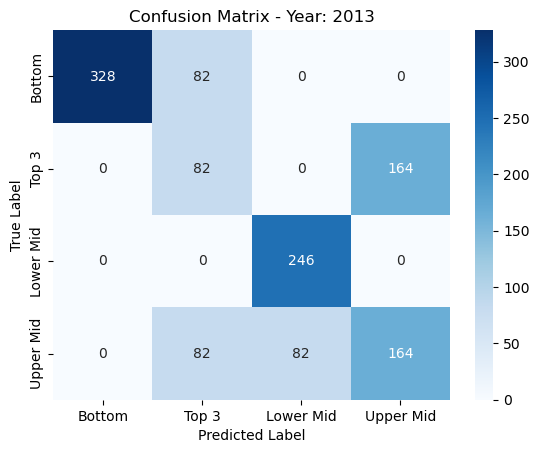


=== Predicting 2014 Rankings ===

Eastern Conference:
=== Year: 2014 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.60      0.75       410
   Lower Mid       0.50      1.00      0.67       246
       Top 3       0.67      0.67      0.67       246
   Upper Mid       0.67      0.50      0.57       328

    accuracy                           0.67      1230
   macro avg       0.71      0.69      0.66      1230
weighted avg       0.74      0.67      0.67      1230

Accuracy Score: 0.6666666666666666


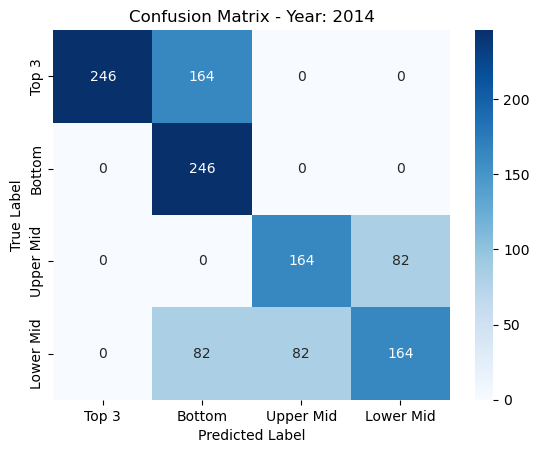


Western Conference:
=== Year: 2014 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      1.00      1.00       410
   Lower Mid       0.67      0.67      0.67       246
       Top 3       0.67      0.67      0.67       246
   Upper Mid       0.50      0.50      0.50       328

    accuracy                           0.73      1230
   macro avg       0.71      0.71      0.71      1230
weighted avg       0.73      0.73      0.73      1230

Accuracy Score: 0.7333333333333333


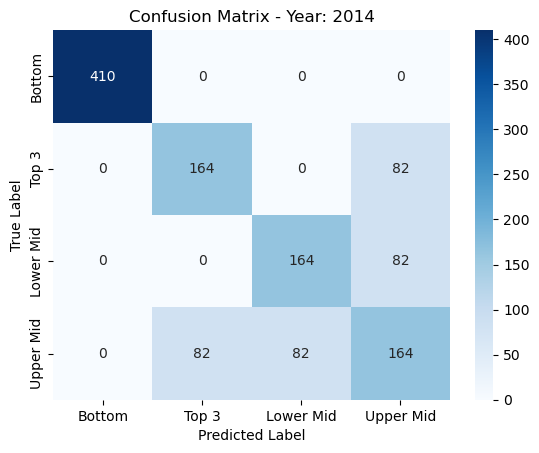


=== Predicting 2015 Rankings ===

Eastern Conference:
=== Year: 2015 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.40      0.57       410
   Lower Mid       0.40      0.67      0.50       246
       Top 3       0.67      0.67      0.67       246
   Upper Mid       0.40      0.50      0.44       328

    accuracy                           0.53      1230
   macro avg       0.62      0.56      0.55      1230
weighted avg       0.65      0.53      0.54      1230

Accuracy Score: 0.5333333333333333


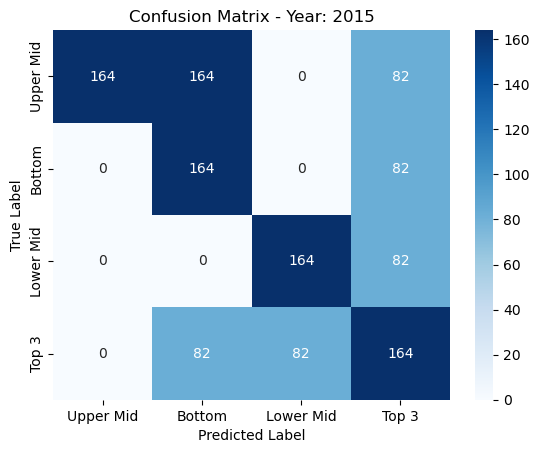


Western Conference:
=== Year: 2015 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.56      1.00      0.71       410
   Lower Mid       0.00      0.00      0.00       246
       Top 3       1.00      1.00      1.00       246
   Upper Mid       1.00      0.50      0.67       328

    accuracy                           0.67      1230
   macro avg       0.64      0.62      0.60      1230
weighted avg       0.65      0.67      0.62      1230

Accuracy Score: 0.6666666666666666


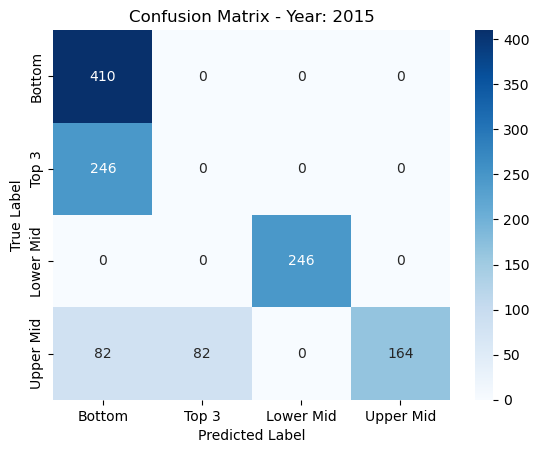


=== Predicting 2016 Rankings ===

Eastern Conference:
=== Year: 2016 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.40      0.57       410
   Lower Mid       0.60      1.00      0.75       246
       Top 3       0.75      1.00      0.86       246
   Upper Mid       0.75      0.75      0.75       328

    accuracy                           0.73      1230
   macro avg       0.78      0.79      0.73      1230
weighted avg       0.80      0.73      0.71      1230

Accuracy Score: 0.7333333333333333


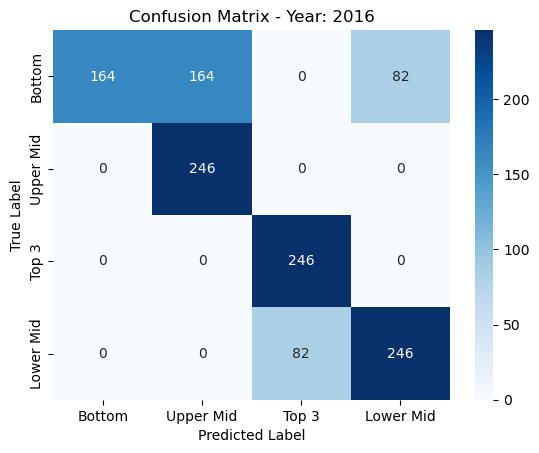


Western Conference:
=== Year: 2016 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.62      1.00      0.77       410
   Lower Mid       0.00      0.00      0.00       246
       Top 3       1.00      1.00      1.00       246
   Upper Mid       1.00      0.50      0.67       328

    accuracy                           0.67      1230
   macro avg       0.66      0.62      0.61      1230
weighted avg       0.68      0.67      0.63      1230

Accuracy Score: 0.6666666666666666


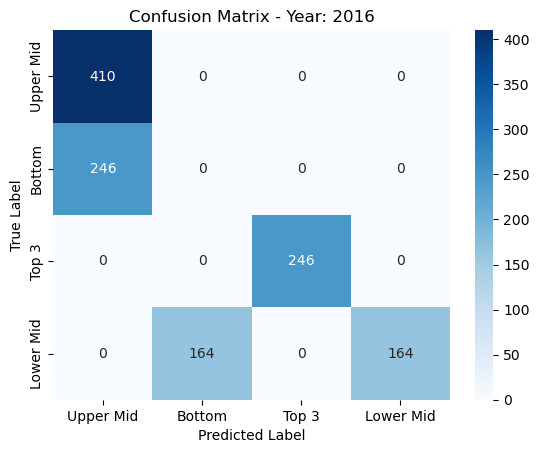


=== Predicting 2017 Rankings ===

Eastern Conference:
=== Year: 2017 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.75      0.60      0.67       410
   Lower Mid       0.20      0.33      0.25       246
       Top 3       1.00      1.00      1.00       246
   Upper Mid       0.67      0.50      0.57       328

    accuracy                           0.60      1230
   macro avg       0.65      0.61      0.62      1230
weighted avg       0.67      0.60      0.62      1230

Accuracy Score: 0.6


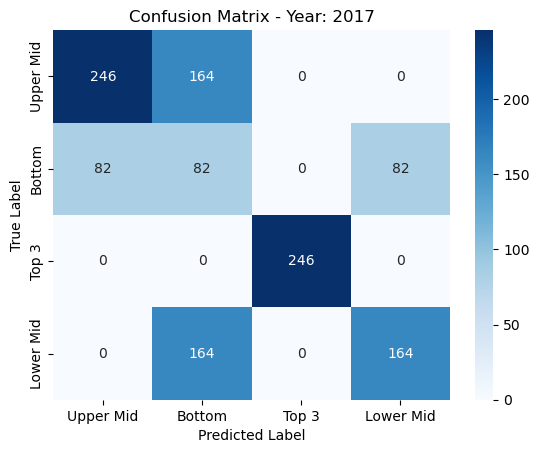


Western Conference:
=== Year: 2017 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       410
   Lower Mid       0.25      0.67      0.36       246
       Top 3       0.00      0.00      0.00       246
   Upper Mid       0.00      0.00      0.00       328

    accuracy                           0.40      1230
   macro avg       0.31      0.37      0.31      1230
weighted avg       0.38      0.40      0.37      1230

Accuracy Score: 0.4


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


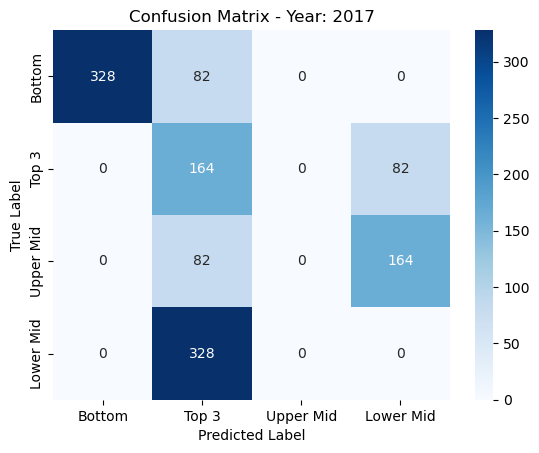


=== Predicting 2018 Rankings ===

Eastern Conference:
=== Year: 2018 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.67      0.80      0.73       410
   Lower Mid       0.67      0.67      0.67       246
       Top 3       1.00      1.00      1.00       246
   Upper Mid       1.00      0.75      0.86       328

    accuracy                           0.80      1230
   macro avg       0.83      0.80      0.81      1230
weighted avg       0.82      0.80      0.80      1230

Accuracy Score: 0.8


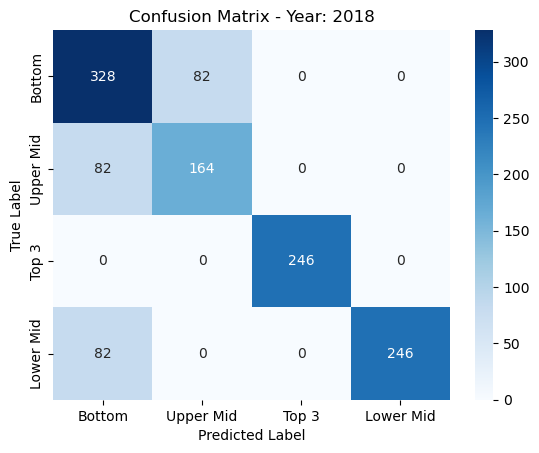


Western Conference:
=== Year: 2018 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.80      0.89       410
   Lower Mid       0.67      0.67      0.67       246
       Top 3       1.00      0.67      0.80       246
   Upper Mid       0.67      1.00      0.80       328

    accuracy                           0.80      1230
   macro avg       0.83      0.78      0.79      1230
weighted avg       0.84      0.80      0.80      1230

Accuracy Score: 0.8


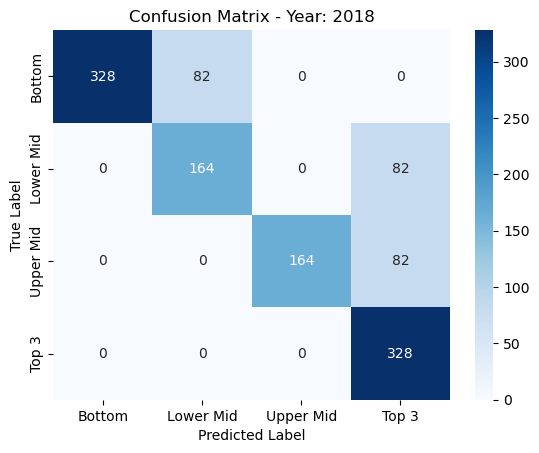


=== Predicting 2019 Rankings ===

Eastern Conference:
=== Year: 2019 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.71      1.00      0.83       329
   Lower Mid       0.00      0.00      0.00       210
       Top 3       0.60      1.00      0.75       217
   Upper Mid       0.67      0.50      0.57       291

    accuracy                           0.66      1047
   macro avg       0.49      0.62      0.54      1047
weighted avg       0.53      0.66      0.57      1047

Accuracy Score: 0.6599808978032474


C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\janmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


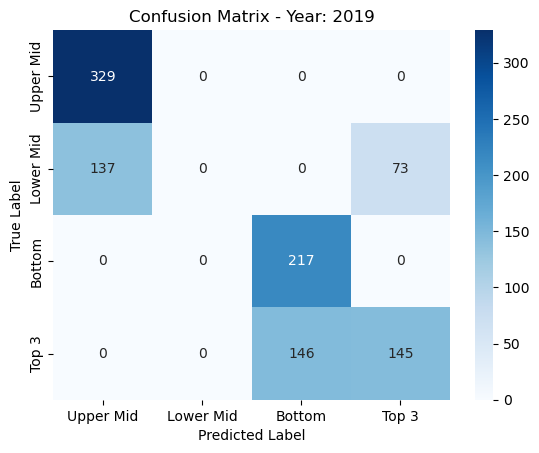


Western Conference:
=== Year: 2019 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.65      0.79      0.72       344
   Lower Mid       0.26      0.34      0.29       220
       Top 3       1.00      0.33      0.49       216
   Upper Mid       0.50      0.51      0.50       291

    accuracy                           0.53      1071
   macro avg       0.60      0.49      0.50      1071
weighted avg       0.60      0.53      0.53      1071

Accuracy Score: 0.5275443510737629


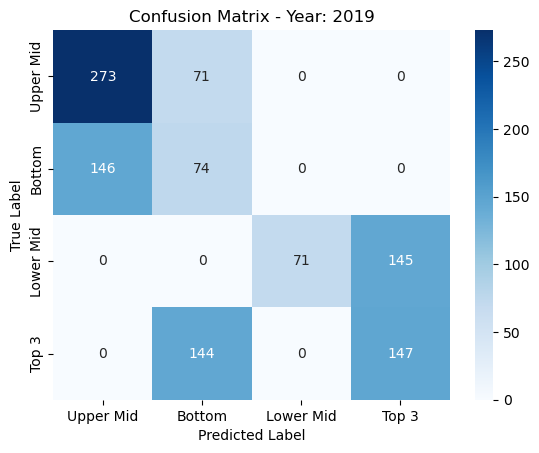


=== Predicting 2020 Rankings ===

Eastern Conference:
=== Year: 2020 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.80      0.80      0.80       360
   Lower Mid       0.50      0.67      0.57       216
       Top 3       0.40      0.67      0.50       216
   Upper Mid       0.00      0.00      0.00       288

    accuracy                           0.53      1080
   macro avg       0.43      0.53      0.47      1080
weighted avg       0.45      0.53      0.48      1080

Accuracy Score: 0.5333333333333333


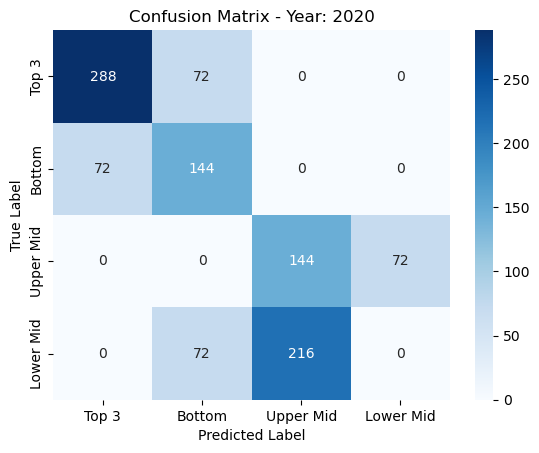


Western Conference:
=== Year: 2020 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.80      0.80      0.80       360
   Lower Mid       0.33      0.33      0.33       216
       Top 3       1.00      0.33      0.50       216
   Upper Mid       0.67      1.00      0.80       288

    accuracy                           0.67      1080
   macro avg       0.70      0.62      0.61      1080
weighted avg       0.71      0.67      0.65      1080

Accuracy Score: 0.6666666666666666


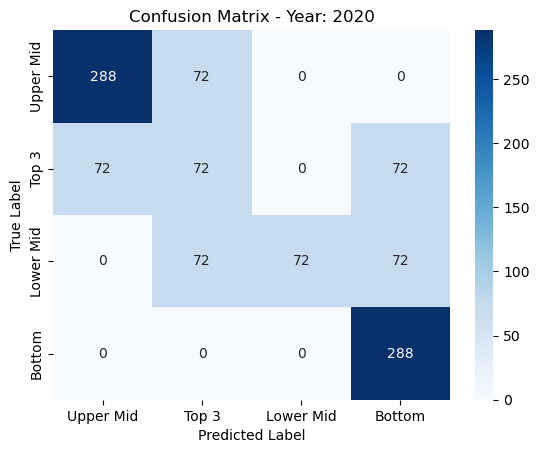


=== Predicting 2021 Rankings ===

Eastern Conference:
=== Year: 2021 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.60      0.75       410
   Lower Mid       0.33      0.33      0.33       246
       Top 3       1.00      0.67      0.80       246
   Upper Mid       0.57      1.00      0.73       328

    accuracy                           0.67      1230
   macro avg       0.73      0.65      0.65      1230
weighted avg       0.75      0.67      0.67      1230

Accuracy Score: 0.6666666666666666


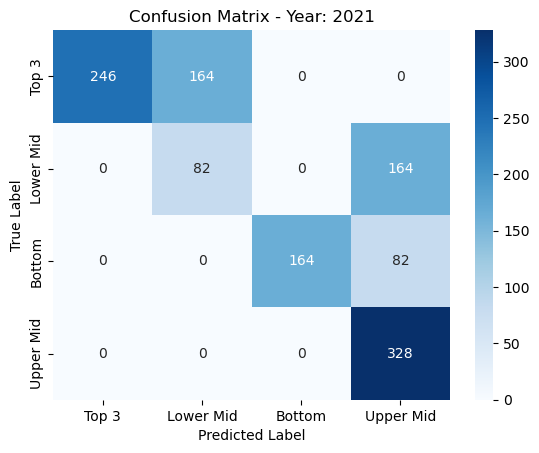


Western Conference:
=== Year: 2021 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.71      1.00      0.83       410
   Lower Mid       0.25      0.33      0.29       246
       Top 3       0.67      0.67      0.67       246
   Upper Mid       0.00      0.00      0.00       328

    accuracy                           0.53      1230
   macro avg       0.41      0.50      0.45      1230
weighted avg       0.42      0.53      0.47      1230

Accuracy Score: 0.5333333333333333


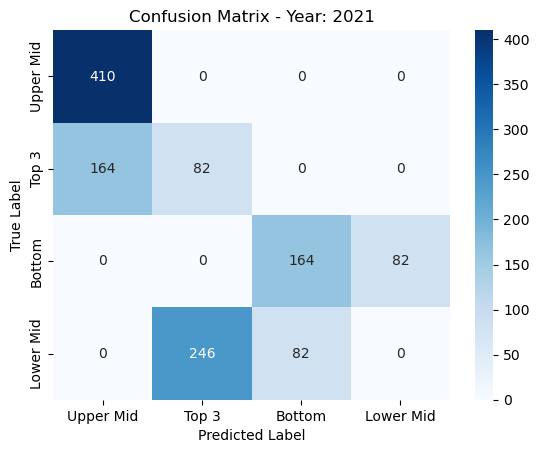


=== Predicting 2022 Rankings ===

Eastern Conference:
=== Year: 2022 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      0.40      0.57       410
   Lower Mid       0.20      0.33      0.25       246
       Top 3       0.50      0.67      0.57       246
   Upper Mid       0.00      0.00      0.00       328

    accuracy                           0.33      1230
   macro avg       0.42      0.35      0.35      1230
weighted avg       0.47      0.33      0.35      1230

Accuracy Score: 0.3333333333333333


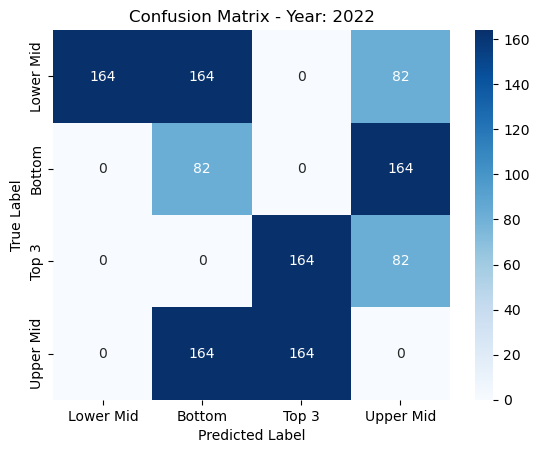


Western Conference:
=== Year: 2022 ===
Classification Report:
               precision    recall  f1-score   support

      Bottom       0.80      0.80      0.80       410
   Lower Mid       0.20      0.33      0.25       246
       Top 3       1.00      0.33      0.50       246
   Upper Mid       0.25      0.25      0.25       328

    accuracy                           0.47      1230
   macro avg       0.56      0.43      0.45      1230
weighted avg       0.57      0.47      0.48      1230

Accuracy Score: 0.4666666666666667


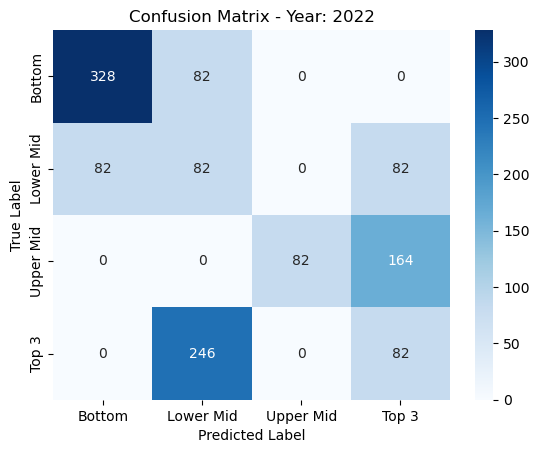

In [5]:
# Iterate over the years, using a rolling window of 4 years of data.
for year in range(2008, 2023):  # Adjust this range based on your dataset
    # Split the data by conference
    eastern_data = filtered_data[filtered_data['Conference'] == 'Eastern Conference']
    western_data = filtered_data[filtered_data['Conference'] == 'Western Conference']

    print(f"\n=== Predicting {year} Rankings ===")
    
    # Train and evaluate for Eastern Conference
    print("\nEastern Conference:")
    train_and_evaluate_yearly(eastern_data, year - 4, year)

    # Train and evaluate for Western Conference
    print("\nWestern Conference:")
    train_and_evaluate_yearly(western_data, year - 4, year)


In [8]:
#Optimal window using other models. 4 Years data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
# train and test, for multiple models.
def evaluate_models(conference_data, start_year, end_year, conference_name, models):
    results = []

    for model_name, model in models.items():
        train_data = conference_data[(conference_data['Year'] >= start_year) & (conference_data['Year'] < end_year)]
        test_data = conference_data[conference_data['Year'] == (end_year + 1)]
        
        X_train = train_data[['Elo Rating']]
        y_train = train_data['ranking_class']

        X_test = test_data[['Elo Rating']]
        y_test = test_data['ranking_class']
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the result
        results.append({
            "Model": model_name,
            "Year": end_year,
            "Conference": conference_name,
            "Accuracy": accuracy
        })

    return results


In [10]:
from sklearn.tree import DecisionTreeClassifier

# models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)  # Added Decision Tree
}


In [11]:
# Initialize a list to store all results
all_results = []

# Loop through the years and predict
for year in range(2008, 2023):  
    # Split the data by conference
    eastern_data = filtered_data[filtered_data['Conference'] == 'Eastern Conference']
    western_data = filtered_data[filtered_data['Conference'] == 'Western Conference']

    # Evaluate for East
    eastern_results = evaluate_models(eastern_data, year - 4, year, "Eastern", models)
    all_results.extend(eastern_results)

    # Evaluate for West
    western_results = evaluate_models(western_data, year - 4, year, "Western", models)
    all_results.extend(western_results)


In [12]:
# Convert all to a DataFrame
results_df = pd.DataFrame(all_results)

# Pivot the results
results_pivot = results_df.pivot_table(index="Year", columns=["Conference", "Model"], values="Accuracy")

# Print the results
print(results_pivot)


Conference       Eastern                                                  \
Model      Decision Tree Gradient Boosting       KNN Logistic Regression   
Year                                                                       
2008            0.533333          0.533333  0.533333            0.533333   
2009            0.666667          0.666667  0.666667            0.533333   
2010            0.734068          0.734068  0.734068            0.799371   
2011            0.661668          0.661668  0.661668            0.785380   
2012            0.534202          0.534202  0.534202            0.801303   
2013            0.733333          0.733333  0.733333            0.666667   
2014            0.666667          0.666667  0.666667            0.733333   
2015            0.533333          0.533333  0.533333            0.466667   
2016            0.733333          0.733333  0.733333            0.800000   
2017            0.600000          0.600000  0.600000            0.666667   
2018        

In [13]:
# Calculate the average accuracy per model only
average_results_per_model = results_df.groupby('Model')['Accuracy'].mean().reset_index()
print(average_results_per_model)


                 Model  Accuracy
0        Decision Tree  0.641641
1    Gradient Boosting  0.641641
2                  KNN  0.641641
3  Logistic Regression  0.683453
4        Random Forest  0.641641
5                  SVM  0.697089


# Testing 3, 5, and 7 optimal window

In [15]:
# 3 5 and 7 window
all_results = []

# Function to train, test, and evaluate the model for different time windows
def evaluate_time_windows(conference_data, start_year, end_year, conference_name, models, window_size):
    results = []

    for model_name, model in models.items():
        train_data = conference_data[(conference_data['Year'] >= start_year - (window_size - 1)) & (conference_data['Year'] < end_year)]
        test_data = conference_data[conference_data['Year'] == (end_year + 1)]
        
        X_train = train_data[['Elo Rating']]
        y_train = train_data['ranking_class']

        X_test = test_data[['Elo Rating']]
        y_test = test_data['ranking_class']

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            "Model": model_name,
            "Year": end_year,
            "Conference": conference_name,
            "Window_Size": window_size,
            "Accuracy": accuracy
        })

    return results

# Loop through the years and predict with different time windows
for window_size in [3, 5, 7]: 
    for year in range(2008, 2023): 
        eastern_data = filtered_data[filtered_data['Conference'] == 'Eastern Conference']
        western_data = filtered_data[filtered_data['Conference'] == 'Western Conference']

        # Evaluate for East
        eastern_results = evaluate_time_windows(eastern_data, year - window_size, year, "Eastern", models, window_size)
        all_results.extend(eastern_results)

        # Evaluate for West
        western_results = evaluate_time_windows(western_data, year - window_size, year, "Western", models, window_size)
        all_results.extend(western_results)

# Convert all results to a DataFrame and calculate the average accuracy per model and window size
results_df = pd.DataFrame(all_results)
average_results = results_df.groupby(['Model', 'Window_Size'])['Accuracy'].mean().reset_index()
print(average_results)


                  Model  Window_Size  Accuracy
0         Decision Tree            3  0.639787
1         Decision Tree            5  0.652530
2         Decision Tree            7  0.646135
3     Gradient Boosting            3  0.639787
4     Gradient Boosting            5  0.652530
5     Gradient Boosting            7  0.646135
6                   KNN            3  0.639787
7                   KNN            5  0.652530
8                   KNN            7  0.646135
9   Logistic Regression            3  0.685816
10  Logistic Regression            5  0.692495
11  Logistic Regression            7  0.683606
12        Random Forest            3  0.639787
13        Random Forest            5  0.652530
14        Random Forest            7  0.646135
15                  SVM            3  0.714649
16                  SVM            5  0.694767
17                  SVM            7  0.692464


# Testing for 1 and 2 years

In [16]:
# Initialize for 1 and 2-year windows
one_two_year_results = []

# Loop through the years and predict with 1 and 2-year time windows
for window_size in [1, 2]:
    for year in range(2008, 2023):
        eastern_data = filtered_data[filtered_data['Conference'] == 'Eastern Conference']
        western_data = filtered_data[filtered_data['Conference'] == 'Western Conference']

        # Evaluate for East
        eastern_results = evaluate_time_windows(eastern_data, year - window_size, year, "Eastern", models, window_size)
        one_two_year_results.extend(eastern_results)

        # Evaluate for West
        western_results = evaluate_time_windows(western_data, year - window_size, year, "Western", models, window_size)
        one_two_year_results.extend(western_results)

one_two_year_results_df = pd.DataFrame(one_two_year_results)
average_one_two_year_results = one_two_year_results_df.groupby(['Model', 'Window_Size'])['Accuracy'].mean().reset_index()
print(average_one_two_year_results)



                  Model  Window_Size  Accuracy
0         Decision Tree            1  0.626422
1         Decision Tree            2  0.643771
2     Gradient Boosting            1  0.626422
3     Gradient Boosting            2  0.643771
4                   KNN            1  0.626422
5                   KNN            2  0.643771
6   Logistic Regression            1  0.688097
7   Logistic Regression            2  0.672508
8         Random Forest            1  0.626422
9         Random Forest            2  0.643771
10                  SVM            1  0.655065
11                  SVM            2  0.688357
